In [17]:
import numpy as np
import h5py
import os

# Plot
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
os.getcwd()

'/home/b08209033/Dycore/exp/Shallow_Water/temp'

In [18]:
file = h5py.File('daily.jld', 'r')
print(file)

<HDF5 file "daily.jld" (mode r)>


In [19]:
for key in file.keys():
    print(key)

h_daily_mean
u_daily_mean
v_daily_mean


In [20]:
u = file["u_daily_mean"][:]
v = file["v_daily_mean"][:]
h = file["h_daily_mean"][:]

In [21]:
class GIFs:
    def __init__(self, data, name):
        self.fig, self.ax = plt.subplots(figsize=(16, 9), 
                                         dpi = 160)
        self.data = data
        self.name = name
        self.image = None
        return None
    def run(self):
        def init():
            argmax = np.max(np.abs(self.data))
            self.levels = np.linspace(-argmax, argmax, 128)
            self.image = self.ax.contourf(self.data[0,0,:,:], 
                                          levels = self.levels, 
                                          extend = "both", 
                                          cmap = "bwr")
            plt.colorbar(self.image)
            return None
        def update(time):
            try:
                plt.cla()
            except:
                pass
            self.ax.contourf(self.data[time+1,0,:,:], 
                             levels = self.levels, 
                             extend = "both", 
                             cmap = "bwr")
            return None
        self.anim = animation.FuncAnimation(fig = self.fig, 
                                            func = update,
                                            frames = 30,  
                                            interval = 50,
                                            init_func = init,
                                            blit = False)
        self.anim.save(f"{self.name}.mp4")
        return None

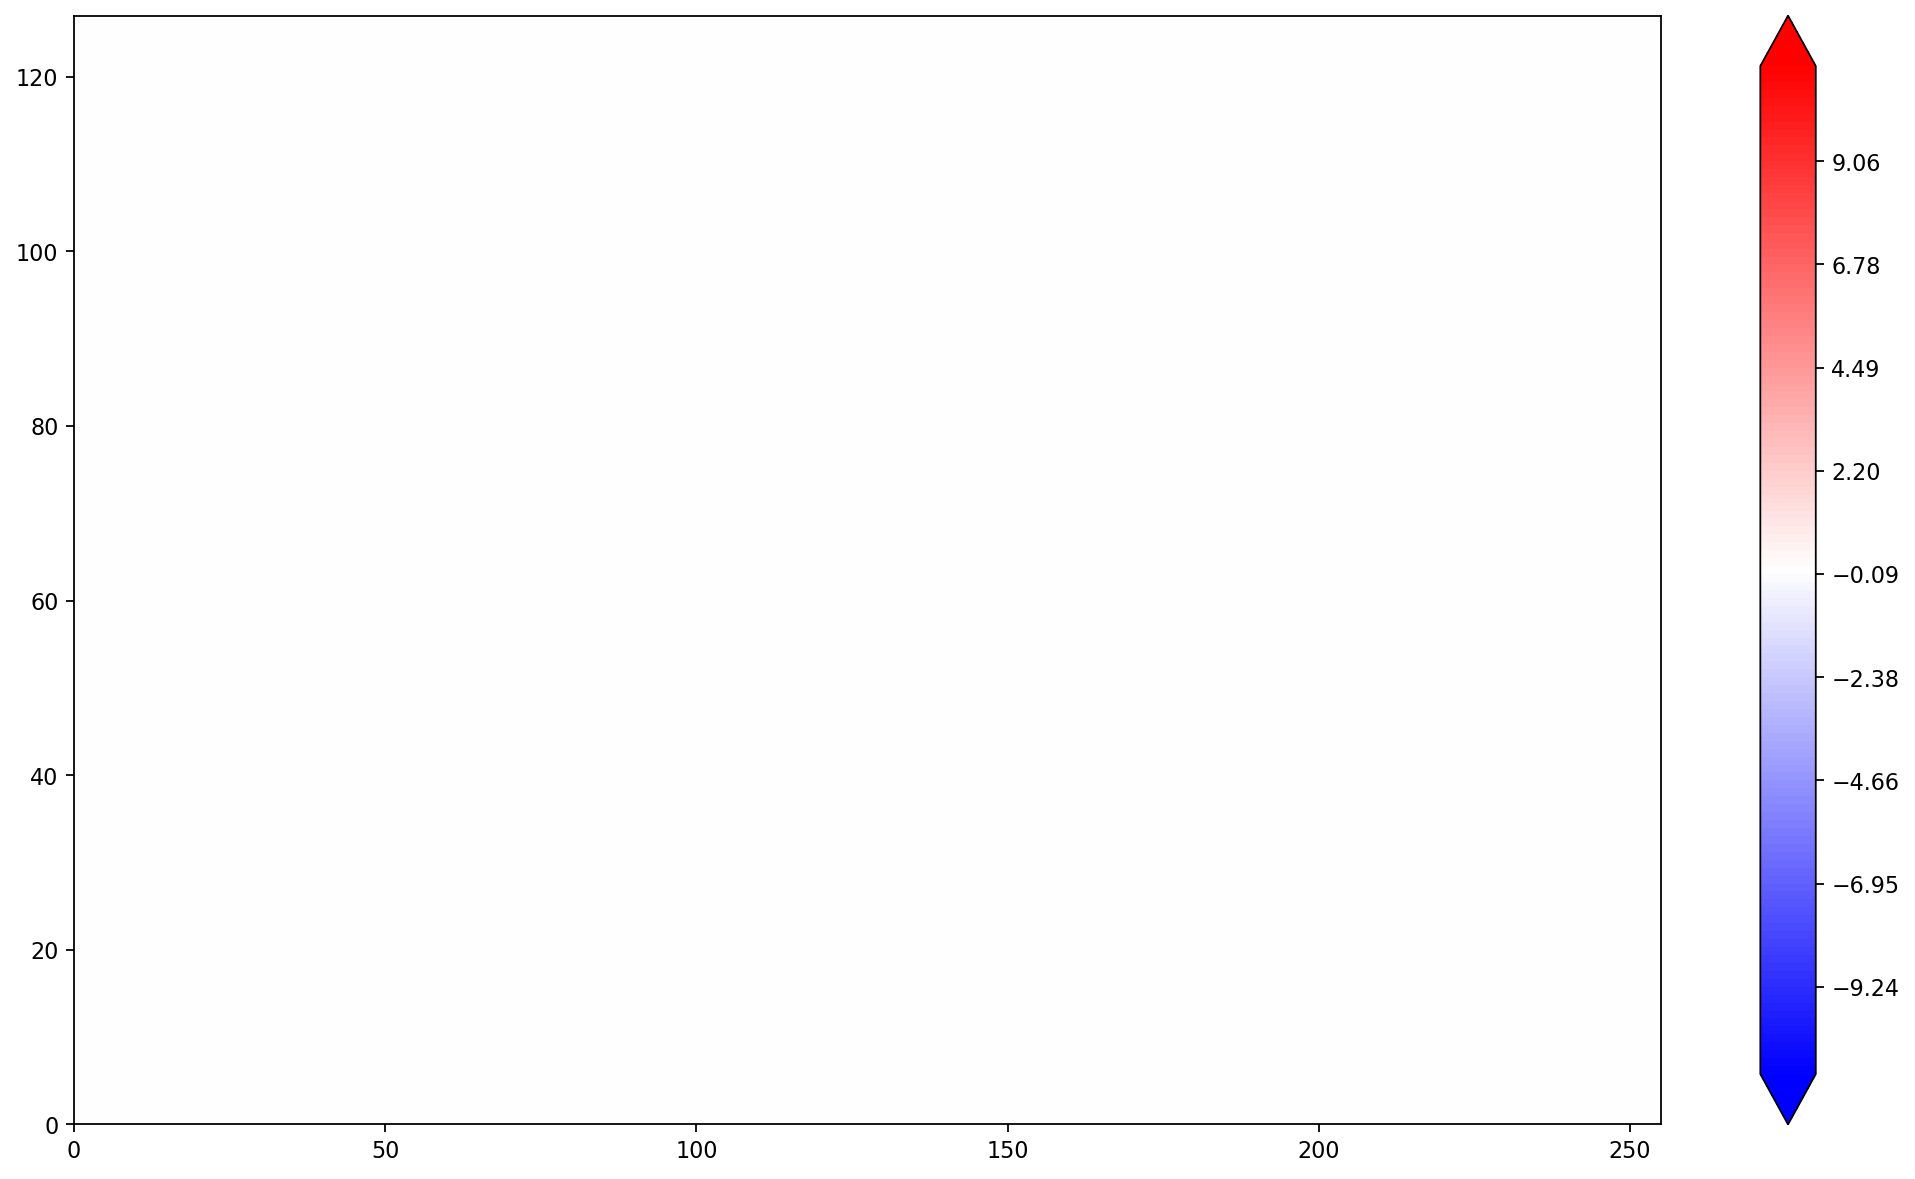

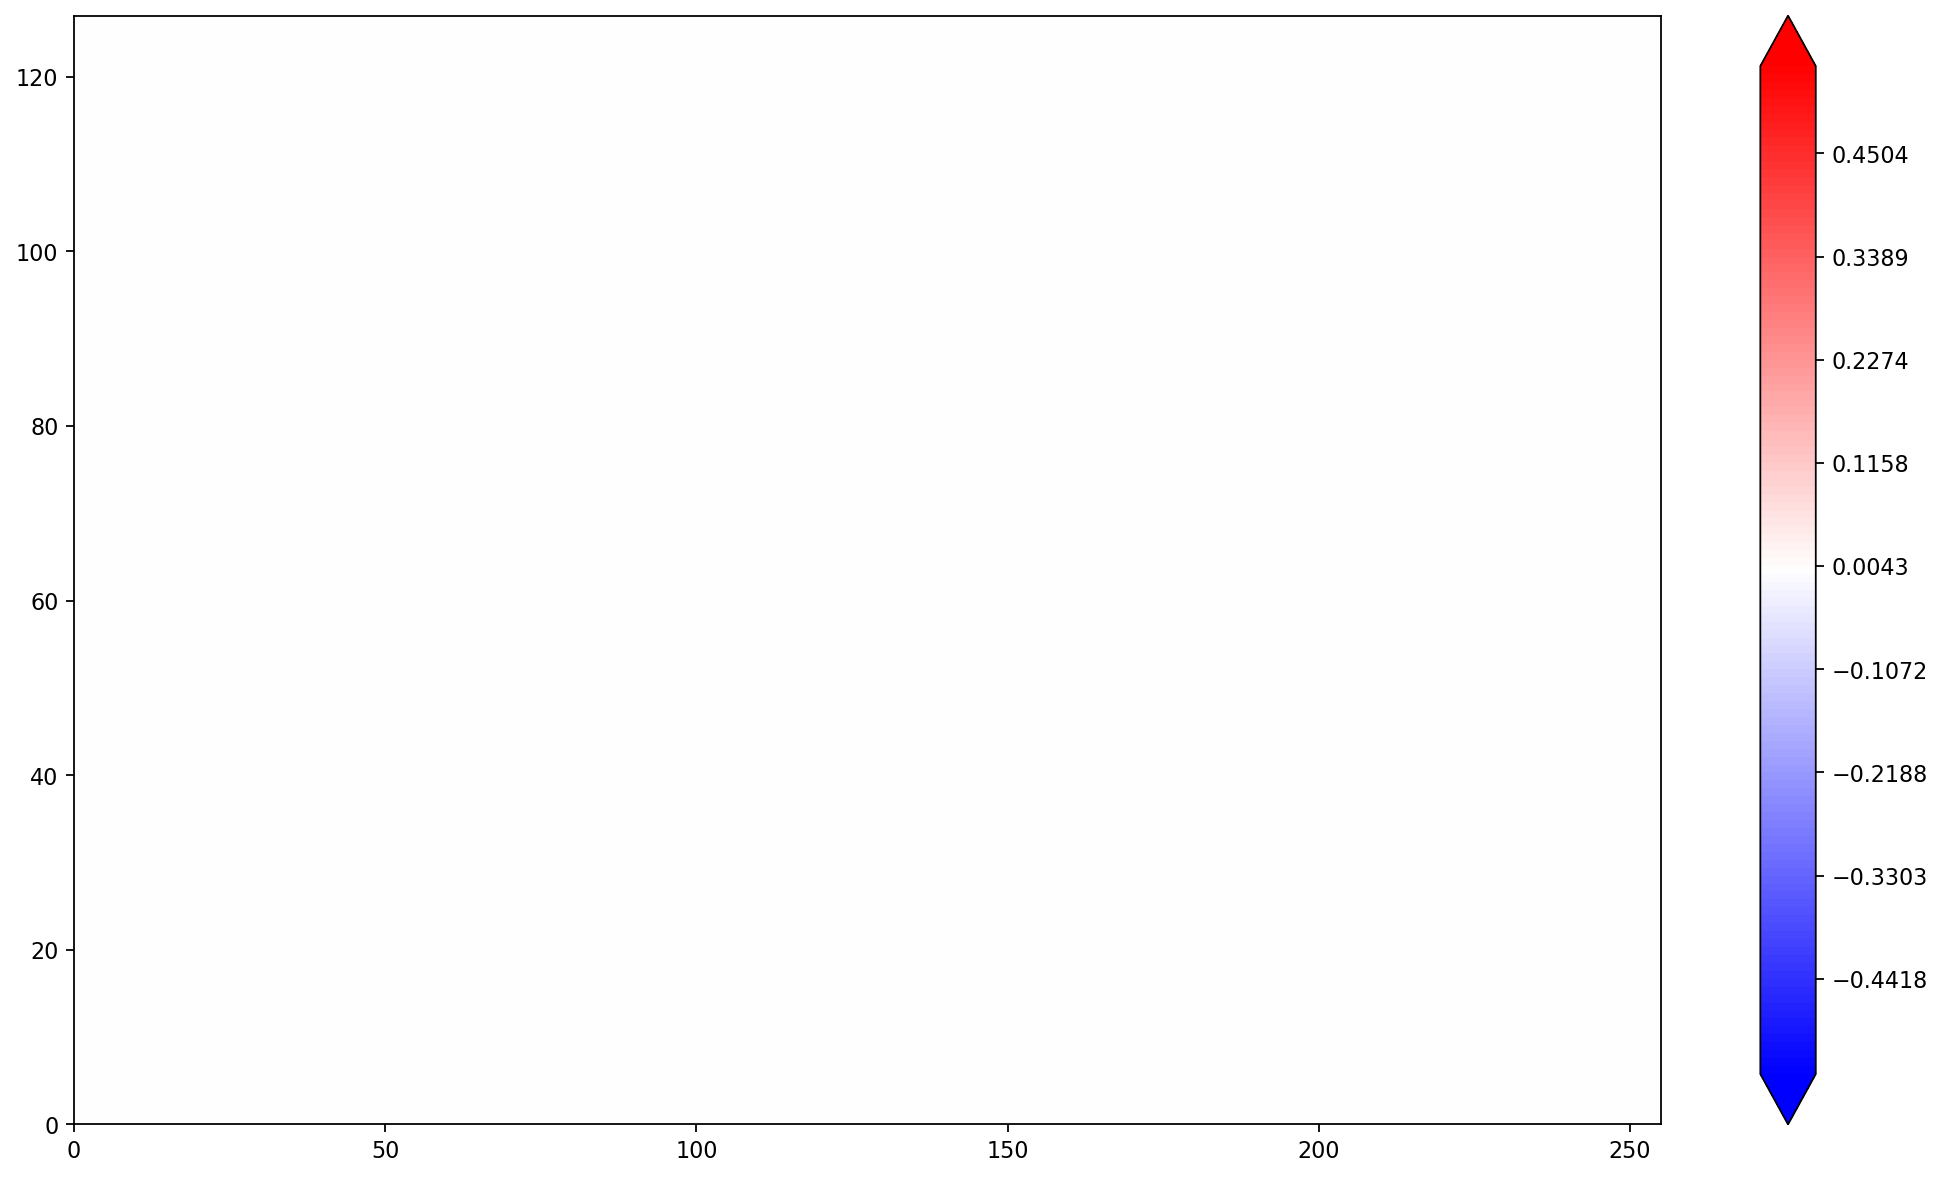

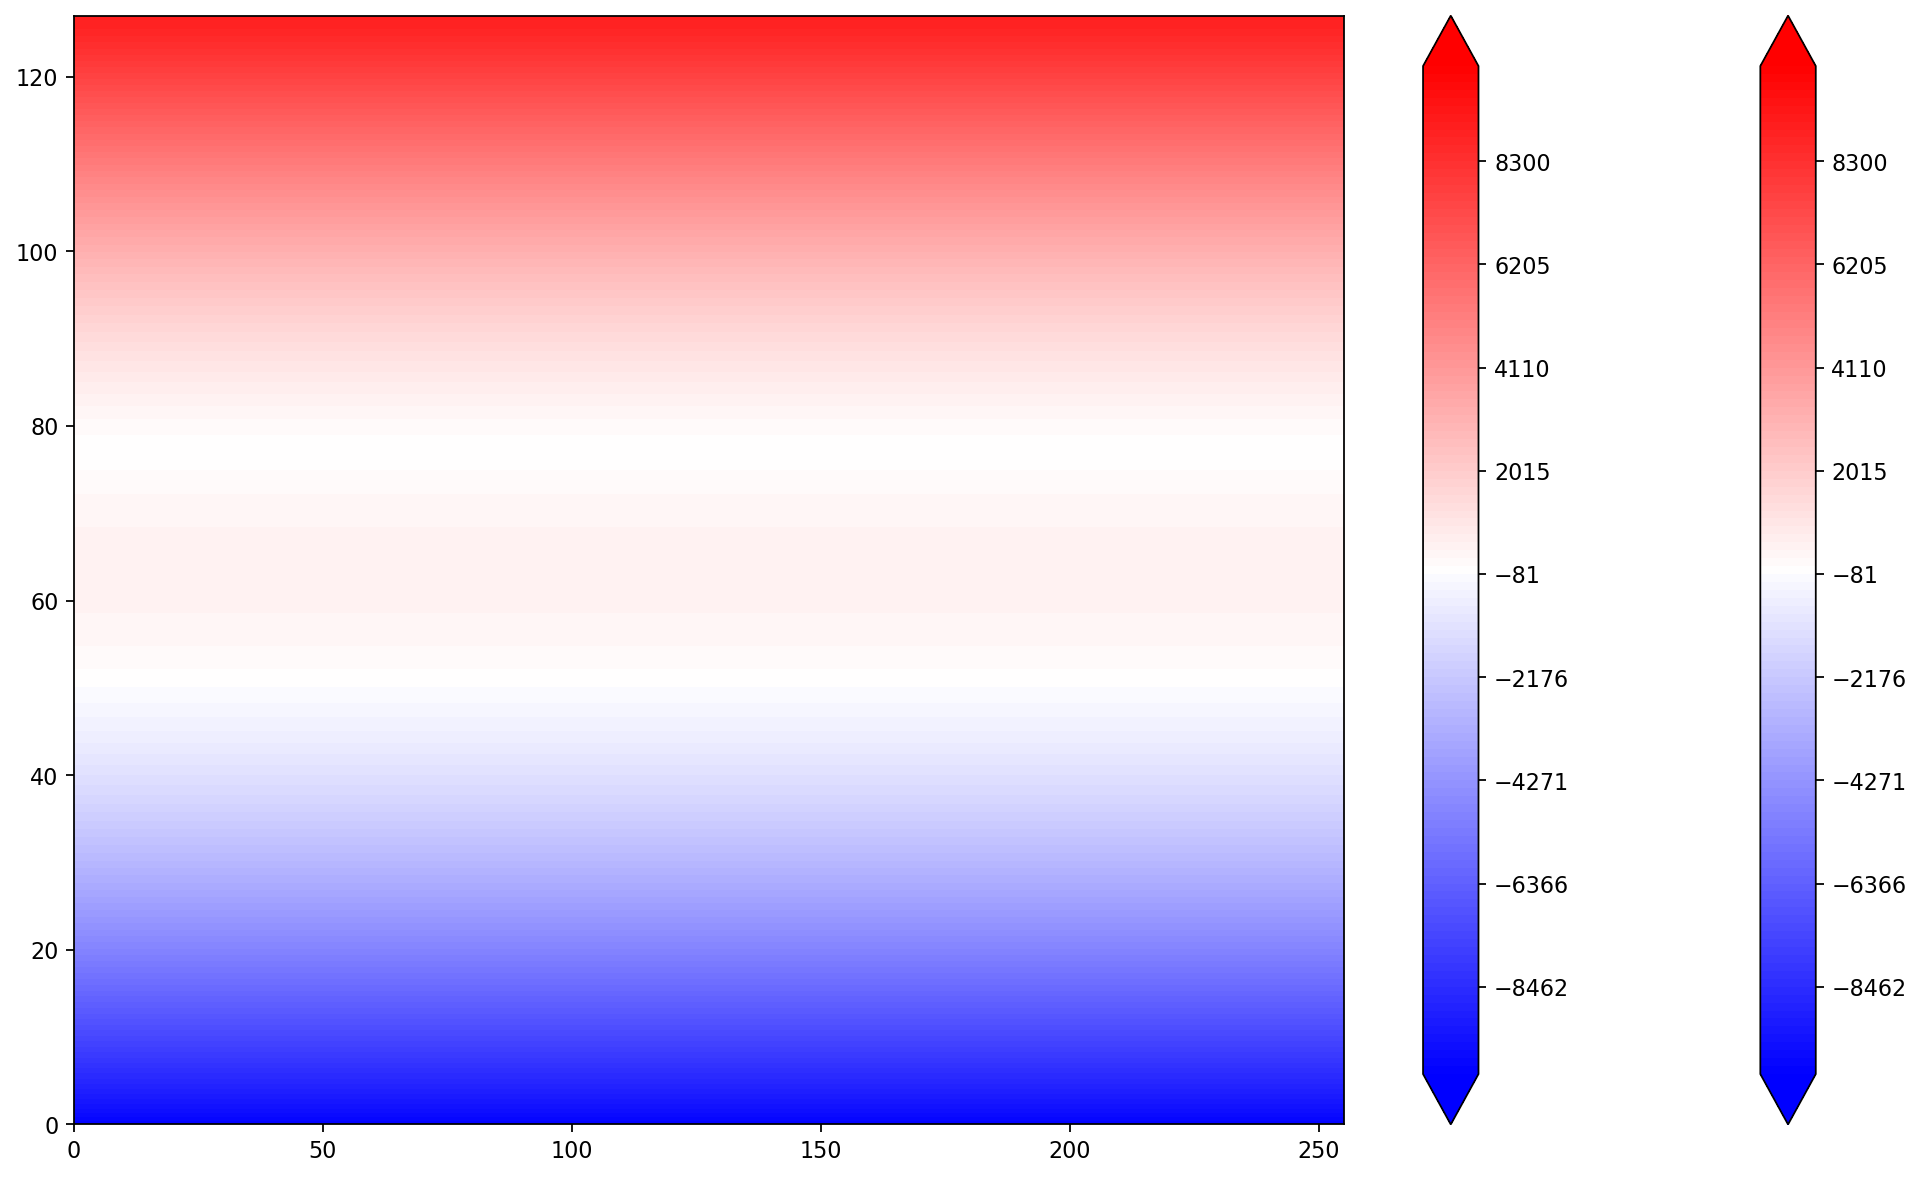

In [22]:
obj = GIFs(u, "u_wind")
obj.run()
obj = GIFs(v, "v_wind")
obj.run()
obj = GIFs(h-10000, "geopotential")
obj.run()